# CS216 : Assignment 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# for problem 1
import os
from skimage.transform import resize

# 1. Image Manipulation  

In this exercise you will write code which loads a collection of images (which are all the same size), computes a pixelwise average of the images, and displays the resulting average.  You can see some interesting related discussion here http://people.csail.mit.edu/torralba/gallery/ and here http://www.salavon.com/work/SpecialMoments/
***
Download the images provided on the Canvas course website for this assignment `averageimage_data.zip`. There are two sets, `set1` and `set2`. Notice that they are not necessarily all the same size within a single set.

***

### 1.1 Implementation [18pts]

Write a function in the cell below that loads in one of the sets of images and computes their average. You can use the **os.listdir** to get the list of files in the directory. As you load in the images, you should compute an average image on the fly. Color images are represented by a 3-dimensional array of size (HxWx3) where the third dimension indexes the red, green and blue channels. Your final average color image. Since the images are not the same size, you will first need to resize each image to a fixed size (e.g. something like 300x215). You can set the height and width to be size of the first image you load, or if you want to be a bit more clever, make it the average dimensions of the images in the directory.

You should encapsulate your code in a function called **average_image** that takes the image directory as an input and returns the average of the images in that directory. Your function should implement some error checking. Specifically your function should skip over any files in the directory that are not images (**plt.imread** will thrown an **OSError** if the file is not an image). It should also ignore images that are not color images. 

NOTE: In general for this course we will think of images as containing floating point values. In practice, when stored in files they are typically quantized and stored as uint8 values. When you load in an image it is usually a good idea to just convert it to a float in the range [0,1] to avoid potential bugs later when you try to do mathematical operations of the pixel values. You can use some code like:
```python
if (I.dtype == np.uint8):
   I = I.astype(float) / 256.
```

to carry this out.

In [2]:
def average_image(dirname):
    """
    Computes the average of all color images in a specified directory and returns the result.
    
    Parameters
    ----------
    dirname : str
        Directory to search for images

    Returns
    -------
    numpy.array (dtype=float)
        HxWx3 array containing the average of the images found
        
    """
    
    image_count = 0
    
    for file in os.listdir(dirname):
        filename = os.path.join(dirname, file)
        
        if os.path.isfile(filename):
            try:
                image = plt.imread(filename)
                # check if file is a color image
                if len(image.shape)==3:
                    image_count += 1
                else:
                    print("Encountered non-RGB image", file)
                    continue
            except OSError as err:
                print("Encountered non-image file", file)
                continue
        
        # initialize the size as size of the first image
        if image_count==1:
            H, W, C = image.shape
            avg_image = np.zeros(shape=(H,W,C))

        # resize function from skimage also converts image to float64 and range [0.0, 1.0]
        resized_image = resize(image, (H,W,C)) 
        avg_image = (avg_image*(image_count-1) + resized_image)/image_count
                
    assert avg_image.dtype=='float64'
    assert avg_image.shape[2]==3
    
    print("Total images averaged = ", image_count)
    
    return avg_image

***

### 1.2 Visualization [7pts]

Write code below which calls your **average_image()** function twice, once for each set of images. Display the resulting average images. Also display a single example image from each set for comparison. Discuss briefly what you see. In what ways does the average differ from the individual examples?

Encountered non-RGB image gray.jpg
Total images averaged =  57


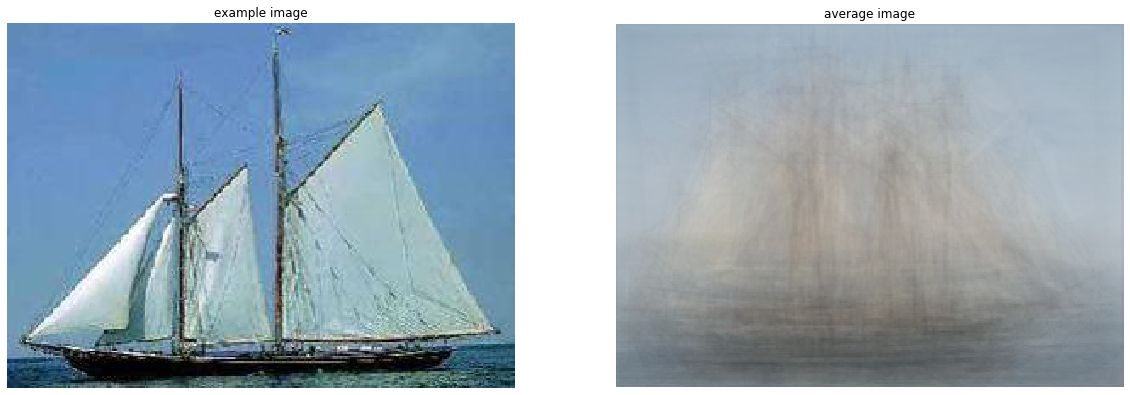

In [3]:
### SET 1 ###

example_image = plt.imread('./averageimage_data/set1/im03.jpg')
average = average_image('./averageimage_data/set1')

fig = plt.figure(figsize=(20,10))
fig.add_subplot(121)
plt.title('example image')
plt.axis('off')
plt.imshow(example_image)

fig.add_subplot(122)
plt.title('average image')
plt.axis('off')
plt.imshow(average)

Encountered non-image file assignment1.pdf
Total images averaged =  100


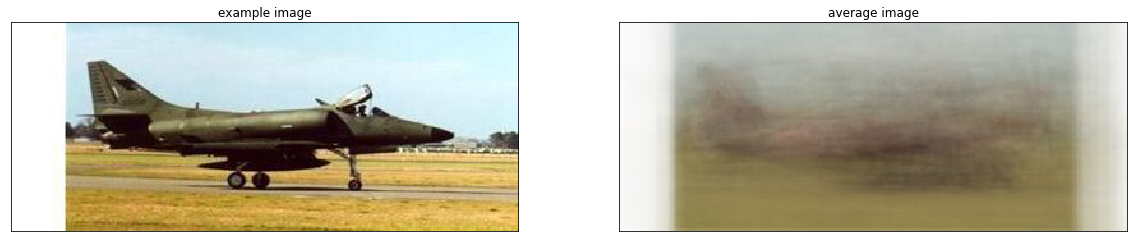

In [4]:
### SET 2 ###

example_image = plt.imread('./averageimage_data/set2/im70.jpg')
average = average_image('./averageimage_data/set2')

fig = plt.figure(figsize=(20,10))
fig.add_subplot(121)
plt.title('example image')
plt.xticks([])
plt.yticks([])
plt.imshow(example_image)

fig.add_subplot(122)
plt.title('average image')
plt.xticks([])
plt.yticks([])
plt.imshow(average)

***

### Discussion

#### Set 1
Set 1 images consist of sailboats of varying sizes but with approximately similar aspect ratios. The common theme in all the images is that the sailboat is in the foreground and almost all the boats have 3 main sails. The background is divided horizontally into the water and the sky. These are the major common features in all the images which can also be seen in the average image.

The average image does not have any clear boundaries between the different parts of the image.

#### Set 2
Set 2 images consist of airplanes. Similar to the boats, the images consist of sideviews of the airplanes, mostly on the ground. We can see the airplane body and the tail in the foreground and the background is divided into the ground and sky. A majority of the planes also have propellors which can be seen in the average image.

The "plane" in the average image seems to be at an angle to the horizontal. The color of the average plane is brown whereas the individual planes are all of varying colors.